# Identifying locations of labels
(work in progress)

For details refer to: https://www.researchgate.net/publication/225367956_The_UJI_librarian_robot (page 11)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import seaborn as sns

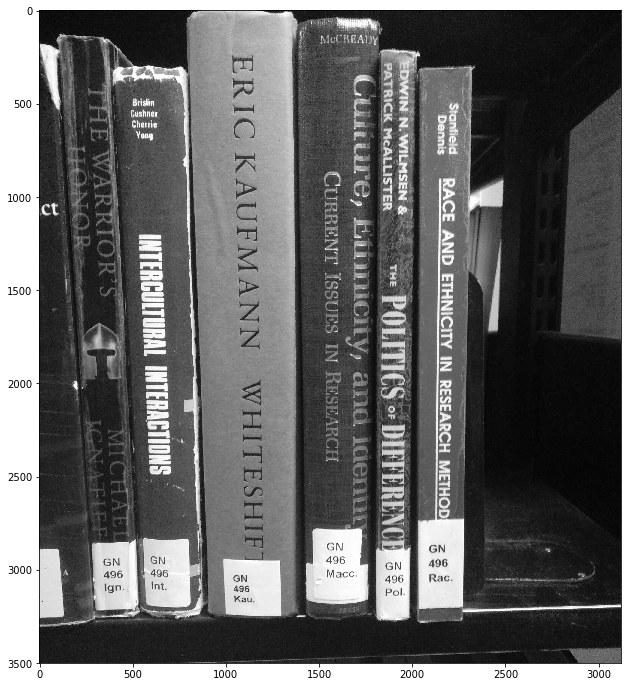

In [62]:
img = cv2.imread('pictures/books1.jpg', cv2.IMREAD_GRAYSCALE)
img = img[0:3500,:] # Cropping the picture
fig = plt.figure(figsize=(16,12))
plt.imshow(img, cmap='gray')
plt.show()

In [63]:
M, N = img.shape
L = 20
C = N / L

In [64]:
M, N

(3500, 3120)

In [65]:
# Maximum row mean intensity (luminosity) for each interval
max_luminosities = []
max_luminosity_rows = []
for interval_idx in range(L):
    interval_luminosities = []
    for row_idx in range(M):
        start = int(interval_idx * C)
        end = int(((interval_idx + 1 ) * C))
        luminosity = np.sum(img[row_idx, start:end]) / C
        interval_luminosities.append(luminosity)
    max_luminosities.append(np.max(interval_luminosities))
    max_luminosity_rows.append(np.argmax(interval_luminosities))

In [66]:
thresholds = 0.85 * np.array(max_luminosities, dtype='float')

In [67]:
img_bin = img.copy()
for interval_idx in range(L):
    start = int(interval_idx * C)
    end = int(((interval_idx + 1)* C))
    img_bin[:, start:end] = 255 * (img_bin[:, start:end] > thresholds[interval_idx])

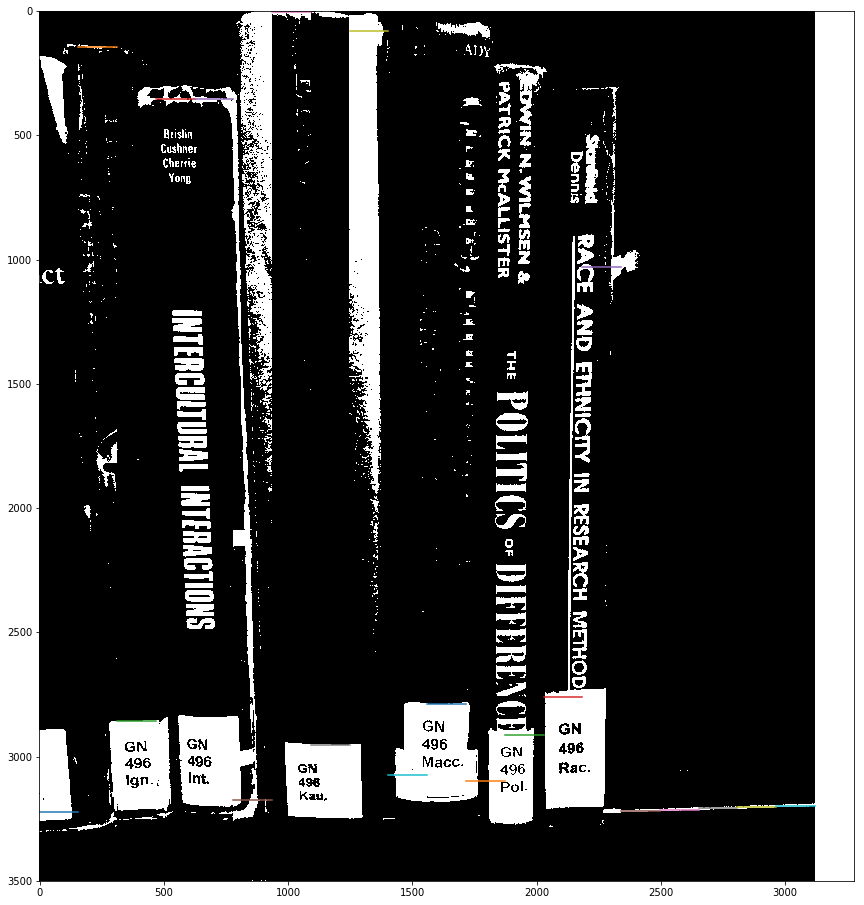

In [68]:
plt.figure(figsize=(20,16))
plt.imshow(img_bin, cmap='gray')
for interval_idx in range(L):
    max_row = max_luminosity_rows[interval_idx]
    start = int(interval_idx * C)
    end = int(((interval_idx + 1)* C))
    plt.plot([start, end],[max_row]*2)
plt.show()

In [69]:
# Save binary image to file
cv2.imwrite('pictures/book_1_bin.jpg', img_bin)

True

In [70]:
M, N

(3500, 3120)

In [76]:
row_sum = np.sum(img_bin, axis=1) / 255
col_sum = np.sum(img_bin, axis=0) / 255

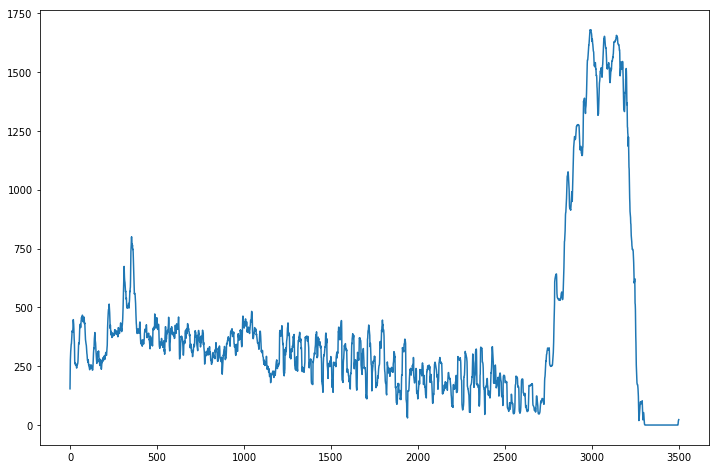

In [89]:
plt.figure(figsize=(12,8))
plt.plot(list(range(M)), row_sum)
plt.show()

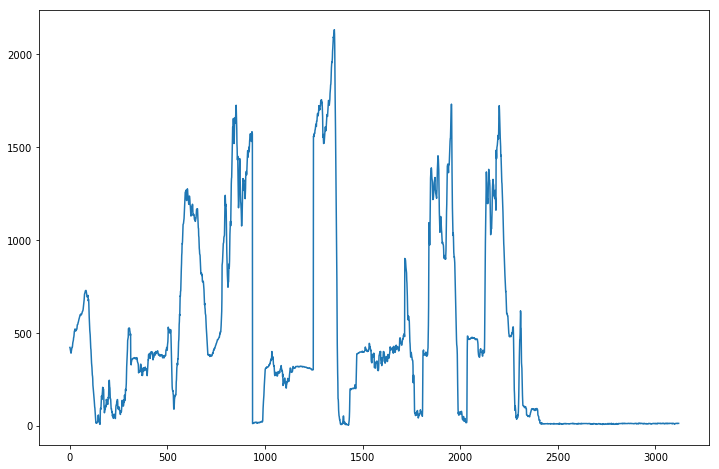

In [90]:
plt.figure(figsize=(12,8))
plt.plot(list(range(N)), col_sum)
plt.show()

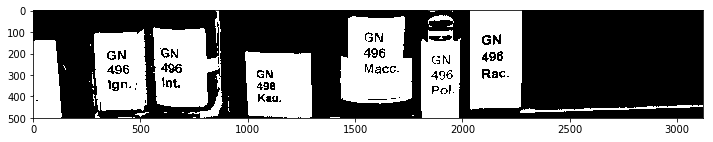

In [91]:
img_cropped = img_bin[2750:3250,:]
plt.figure(figsize=(12,8))
plt.imshow(img_cropped, cmap='gray')
plt.show()

In [92]:
# Save binary image to file
cv2.imwrite('pictures/book1_bin_cropped.jpg', img_cropped)

True